In [1]:
import pandas as pd
import sqlite3 as s3
conn = s3.connect('factbook.db')
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
q = "SELECT MIN(population),MAX(population),MIN(population_growth),MAX(population_growth) FROM facts" 
pd.read_sql_query(q,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q = "SELECT * FROM facts WHERE population == 0"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [5]:
q = "SELECT * FROM facts WHERE population == 7256490011"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Population 0 is Antarctica, and it looks like largest population is actually the global population

   population  population_growth  birth_rate  death_rate
0    32564342               2.32       38.57       13.89
1     3029278               0.30       12.92        6.58
2    39542166               1.84       23.67        4.31
3       85580               0.12        8.13        6.96
4    19625353               2.78       38.78       11.49


IndexError: index 3 is out of bounds for axis 1 with size 2

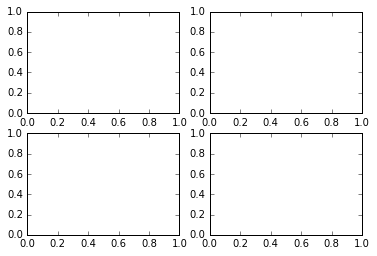

In [12]:
q = "SELECT population, population_growth, birth_rate, death_rate FROM facts where (population > 0 ) & (population < 7256490011)"
df = pd.read_sql_query(q,conn)
print(df.head(5))

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=2)
df.hist(ax=axes[1,1])
df.hist(ax=axes[1,1])
df.hist(ax=axes[2,1])
df.hist(ax=axes[3,1])
plt.show()
